# Principal Component Analysis

## import library

In [184]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [185]:
fname_data = 'assignment_12_data.txt'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

## plot the input data

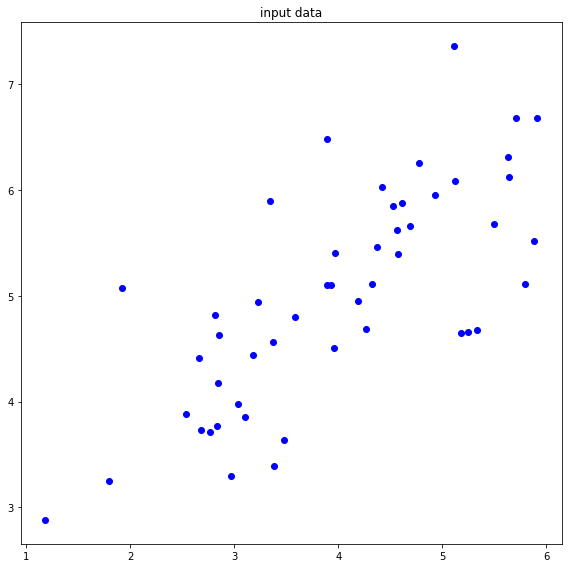

In [186]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.plot(x, y,'o', color='blue')

plt.tight_layout()
plt.show()

In [187]:
np.std(x)

1.161260585149156

## Normalization (Z-scoring)

mean of x = -1.509903313490213e-16
mean of y = -4.840572387365683e-16
std of x = 0.9999999999999999
std of x = 0.9999999999999999


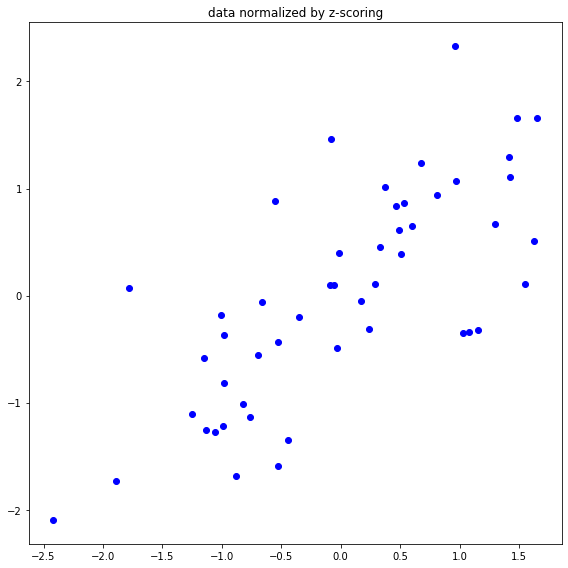

In [188]:
plt.figure(figsize=(8,8))
plt.title('data normalized by z-scoring')

x_normal = (x- x.mean())/np.std(x)
y_normal = (y- y.mean())/np.std(y)

print("mean of x =", x_normal.mean())
print("mean of y =", y_normal.mean())
print("std of x =", np.std(x_normal))
print("std of x =", np.std(y_normal))

plt.plot(x_normal, y_normal,'o', color='blue')

plt.tight_layout()
plt.show()

In [189]:
def normalization(x, y):
    plt.figure(figsize=(8,8))
    plt.title('data normalized by z-scoring')

    x_normal = (x- x.mean())/np.std(x)
    y_normal = (y- y.mean())/np.std(y)
    
    plt.plot(x_normal, y_normal,'o', color='blue')

    plt.tight_layout()
    plt.show()

In [190]:
feature_normal = np.zeros(shape = (number_data, number_feature))

In [191]:
feature_normal = np.zeros(shape = (number_data, number_feature))
for i in range(number_data):
    feature_normal[i][0] = x_normal[i]
    feature_normal[i][1] = y_normal[i]

## compute covariance matrix

In [192]:
def compute_covariance(feature):
    Sigma = np.matmul(feature.T, feature) * (1/number_data)
    return Sigma

## compute principal directions

covariance 함수로 구한 Sigma로 부터 eigenvector와 value를 구해라

In [193]:
def compute_eigen(X):
    S, U = np.linalg.eig(X)
    return S, U

In [194]:
X = compute_covariance(feature_normal)

In [195]:
S, U = compute_eigen(X)

In [221]:
def principal_directions(S, U):

    plt.figure(figsize=(8,8))
    plt.title('principal directions')

    plt.plot(x_normal, y_normal,'o', color='blue')
    plt.quiver(0,0, U[0][0]*S[0], U[1][0]*S[0], scale=1, color = 'r', angles = 'xy', scale_units = 'xy')
    plt.quiver(0, 0, U[0][1]*S[1], U[1][1]*S[1], scale=1, color = 'g', angles = 'xy', scale_units = 'xy')
    
    plt.tight_layout()
    plt.show()

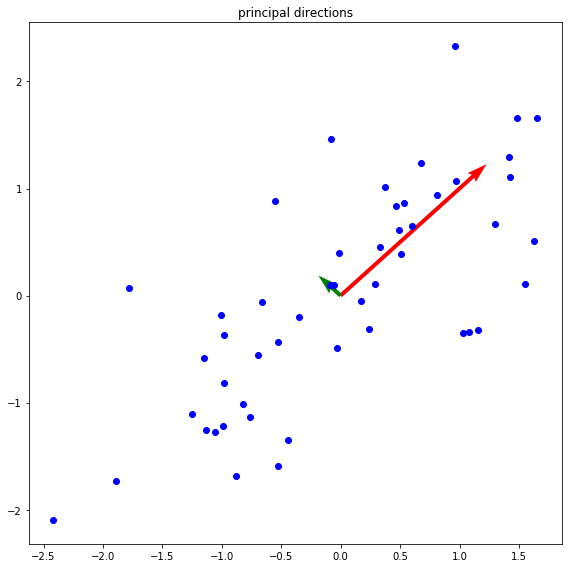

In [222]:
principal_directions(S,U)

In [198]:
def f_1(x):
    f_1 = (U[0][0] / U[1][0]) * x
    return f_1

In [199]:
def f_2(x):
    f_2 = (U[0][1] / U[1][1]) * x
    return f_2

## first principal axis

In [200]:
def first_priciple_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('first principle axis')
    x_normal = feature[:,0]
    y_normal = feature[:,1]
    f = f_1(x_normal)
    plt.plot(x_normal, f,'-', color='red')
    plt.plot(x_normal, y_normal,'o', color='blue')
    plt.tight_layout()
    plt.show()

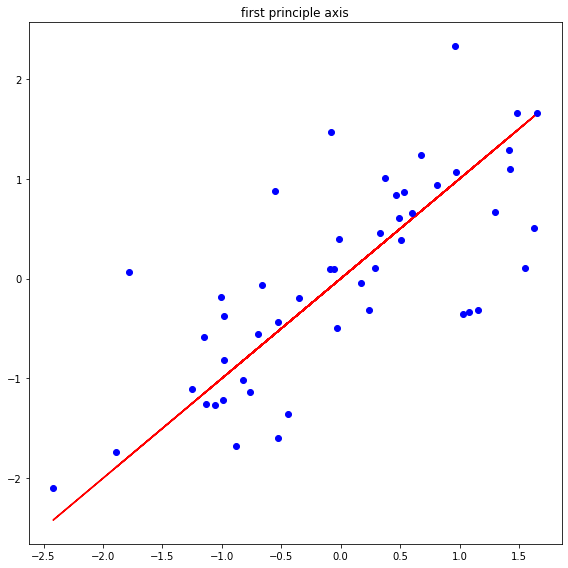

In [201]:
first_priciple_axis(feature_normal)

## second principal axis

In [202]:
def second_priciple_axis(feature):
    plt.figure(figsize=(8,8))
    plt.title('second principle axis')
    x_normal = feature[:,0]
    y_normal = feature[:,1]
    f = f_2(x_normal)
    plt.plot(x_normal, f,'-', color='red')

    plt.plot(x_normal, y_normal,'o', color='blue')
    plt.tight_layout()
    plt.show()

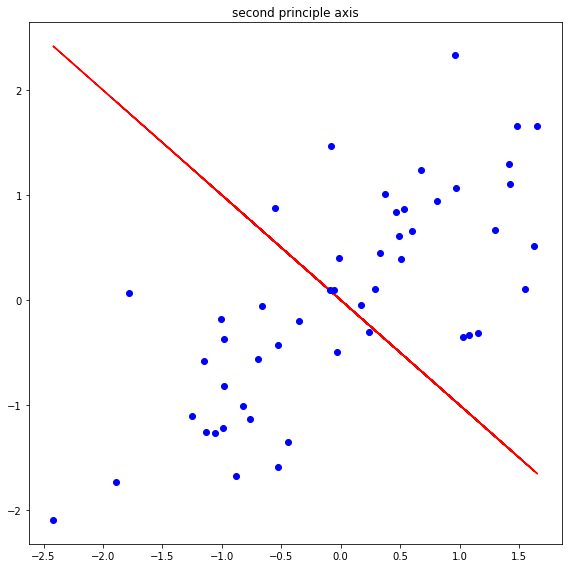

In [203]:
second_priciple_axis(feature_normal)

## compute the projection of point onto the line

In [204]:
def compute_projection_onto_line(feature, vector):
    projection = np.matmul(vector.T, feature.T)
    
    return projection

## projcet to the first principal axis

In [205]:
def proj_to_first_principle(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')
    x_normal = feature[:,0]
    y_normal = feature[:,1]
    f = f_1(x_normal)
    proj = compute_projection_onto_line(feature, vector)
    new_vector = vector[:,0].reshape(2,1)
    proj_2 = new_vector * proj[0]


    plt.plot(x_normal, f,'-', color='red')
    plt.plot(proj_2[0], proj_2[1],'o', color='green')

    plt.plot(x_normal, y_normal,'o', color='blue')
    plt.tight_layout()
    plt.show()

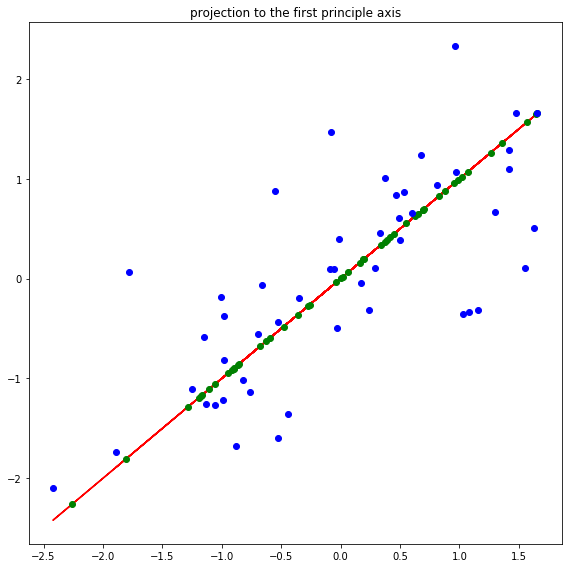

In [206]:
proj_to_first_principle(feature_normal, U)

## projcet to the second principal axis

In [207]:
def proj_to_second_principle(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')
    x_normal = feature[:,0]
    y_normal = feature[:,1]
    f = f_2(x_normal)
    proj = compute_projection_onto_line(feature, vector)
    new_vector = vector[:,1].reshape(2,1)
    proj_2 = new_vector * proj[1]


    plt.plot(x_normal, f,'-', color='red')
    plt.plot(proj_2[0], proj_2[1],'o', color='green')

    plt.plot(x_normal, y_normal,'o', color='blue')
    plt.tight_layout()
    plt.show()

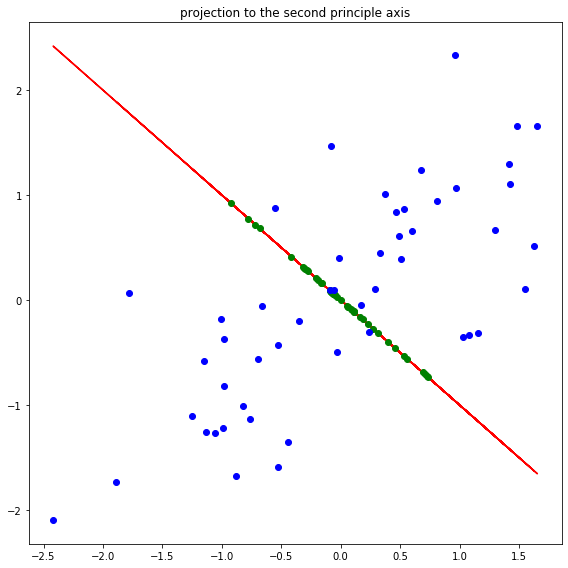

In [208]:
proj_to_second_principle(feature_normal, U)

## connect original data to the projection onto the first principal axis

In [209]:
def connect_first_projection(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the first principle axis')

    x_normal = feature[:,0]
    y_normal = feature[:,1]
    f = f_1(x_normal)
    proj = compute_projection_onto_line(feature, vector)
    new_vector = vector[:,0].reshape(2,1)
    proj_2 = new_vector * proj[0]

    plt.plot(x_normal, f,'-', color='red')
    plt.plot(proj_2[0], proj_2[1],'o', color='green')
    plt.plot([x_normal, proj_2[0]], [y_normal, proj_2[1]], "k")
    plt.plot(x_normal, y_normal,'o', color='blue')
    plt.tight_layout()
    plt.show()

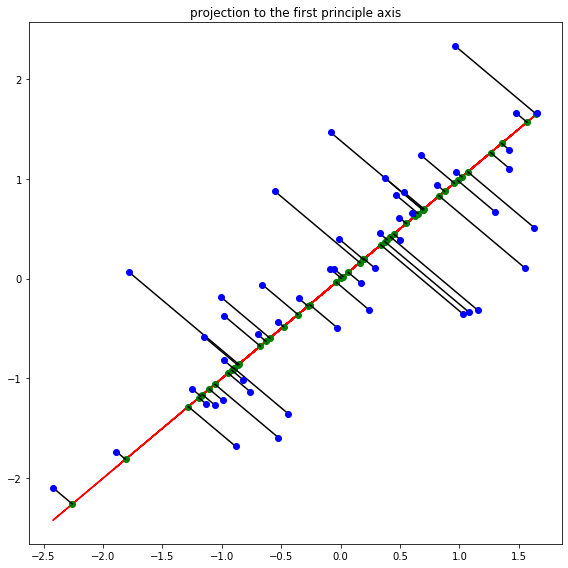

In [210]:
connect_first_projection(feature_normal, U)

## connect original data to the projection onto the second principal axis

In [211]:
def connect_second_projection(feature, vector):
    plt.figure(figsize=(8,8))
    plt.title('projection to the second principle axis')

    x_normal = feature[:,0]
    y_normal = feature[:,1]
    f = f_2(x_normal)
    proj = compute_projection_onto_line(feature, vector)
    new_vector = vector[:,1].reshape(2,1)
    proj_2 = new_vector * proj[1]

    plt.plot(x_normal, f,'-', color='red')
    plt.plot(proj_2[0], proj_2[1],'o', color='green')
    plt.plot([x_normal, proj_2[0]], [y_normal, proj_2[1]], "k")
    plt.plot(x_normal, y_normal,'o', color='blue')
    plt.tight_layout()
    plt.show()

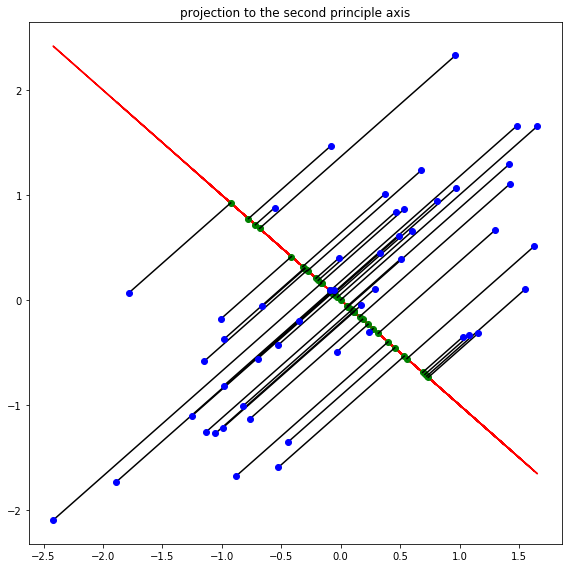

In [212]:
connect_second_projection(feature_normal, U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***

# results

***

### 1. plot the input data after the normalization using Z-scoring in blue

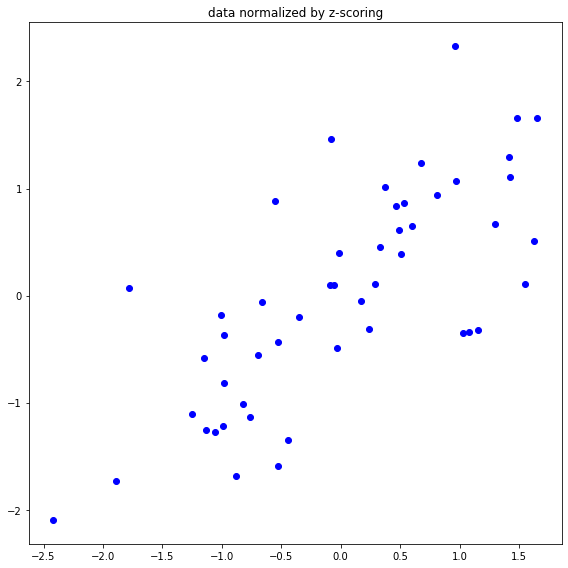

In [213]:
normalization(x, y)

***

### 2. plot the first principal component in red and the second principal components in green on the normalized data in blue

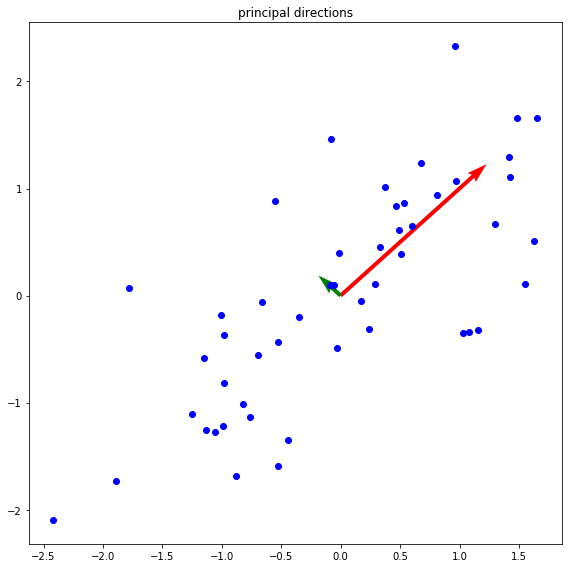

In [214]:
principal_directions(S,U)

***

### 3. plot the first principal axis in red on the normalized data in blue

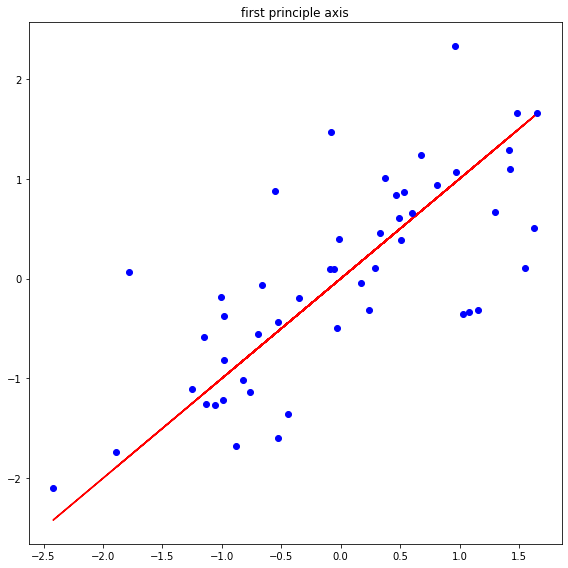

In [215]:
first_priciple_axis(feature_normal)

***

### 4. plot the second principal axis in red on the normalized data in blue

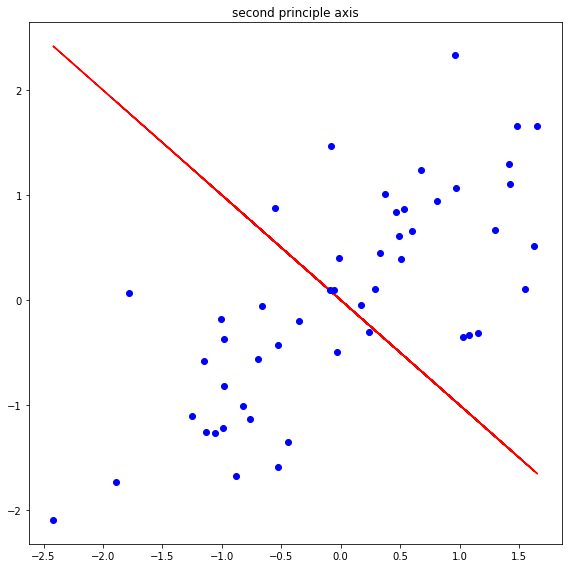

In [216]:
second_priciple_axis(feature_normal)

***

### 5. plot the projection of data in green onto the first principal axis in red

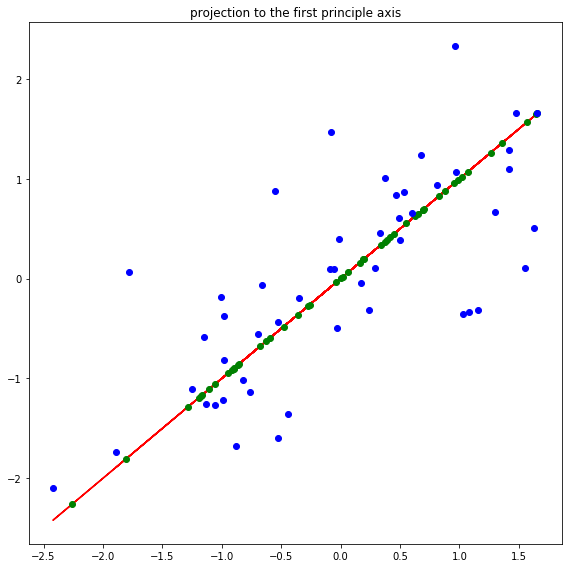

In [217]:
proj_to_first_principle(feature_normal, U)

***

### 6. plot the projection of data in green onto the second principal axis in red

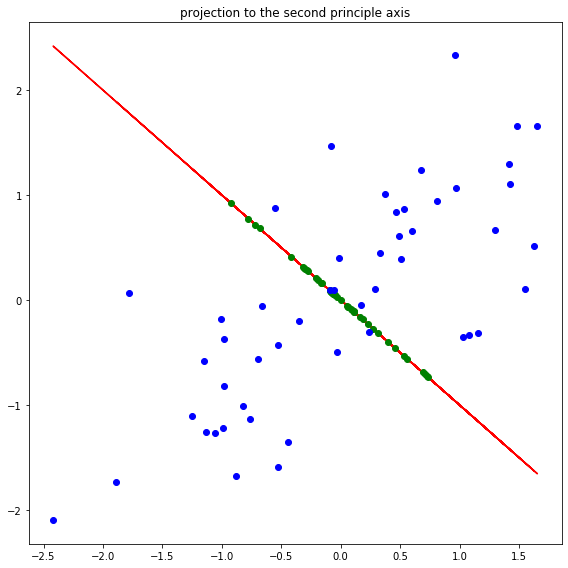

In [218]:
proj_to_second_principle(feature_normal, U)

***

### 7. plot the projection line in grey onto the first principal axis

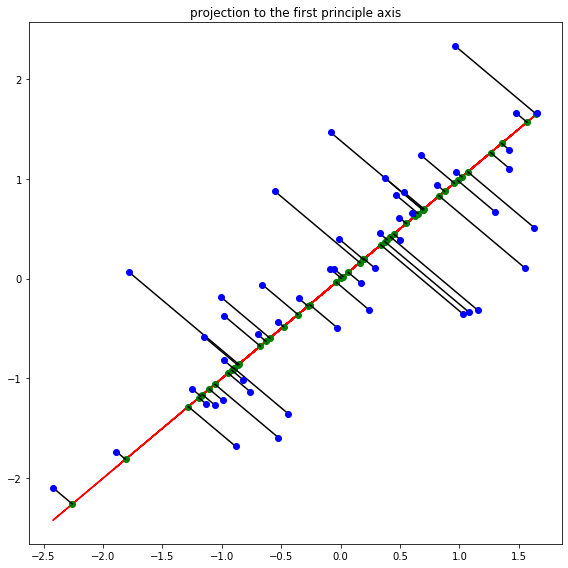

In [219]:
connect_first_projection(feature_normal, U)

***

### 8. plot the projection line in grey onto the second principal axis

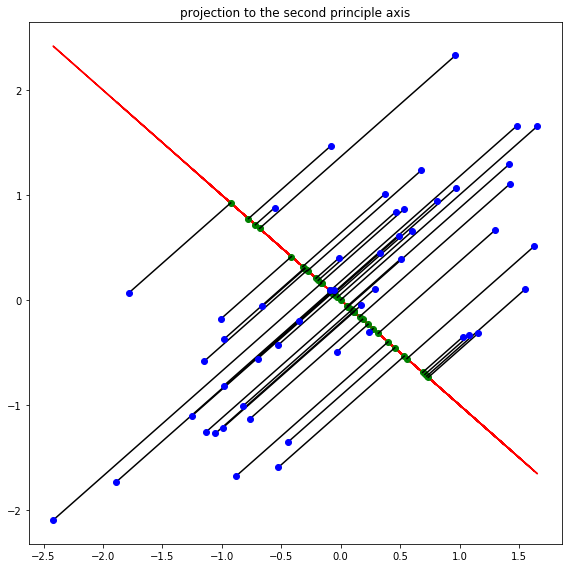

In [220]:
connect_second_projection(feature_normal, U)

#### Note that the title in the above figure is wrong. It should be "second principle axis" instead of "first principle axis"

***